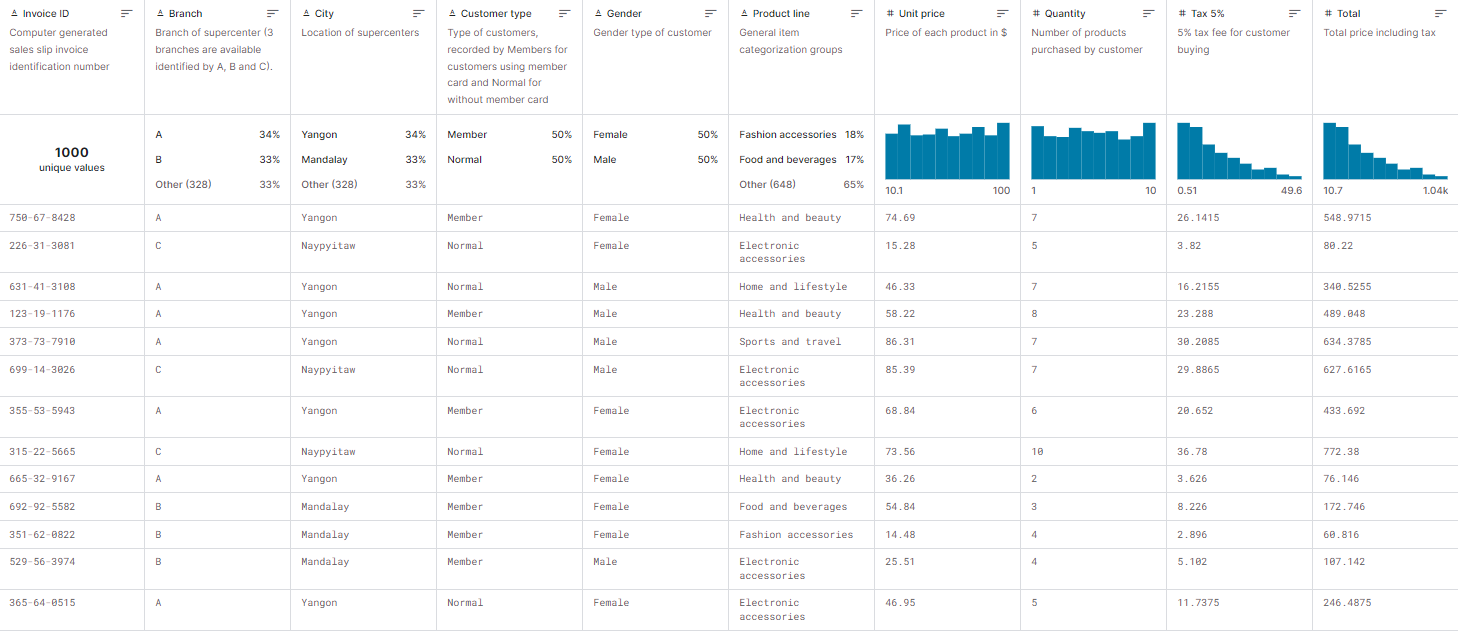

In [5]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import dash_ag_grid as dag
import dash_bootstrap_components as dbc
import pandas as pd

df=pd.read_csv("../Resources/supermarket-sales.csv")

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
print(df)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

#Przygotowywanie danych do wyświetlania

In [7]:
######################################################################################################################
#Przygotowanie danych do wykresu "Przychodów według miast"
city_revenue = df.groupby('City')['Total'].sum().reset_index()

#Tworzenie wykresu przychodów według miast
fig_city_revenue = px.bar(city_revenue, x='City', y='Total', title='Przychody według miast', labels={'Total': 'Całkowity przychód', 'City': 'Miasto'})
######################################################################################################################

######################################################################################################################
#Przygotowanie danych do wykresu "Sprzedaż produktów według ilości"
product_sales = df.groupby('Product line')['Quantity'].sum().reset_index()
sorted_product_sales = product_sales.sort_values(by='Quantity', ascending=False)
fig_quantity = px.bar(sorted_product_sales, x='Product line', y='Quantity', title='Sprzedaż produktów według ilości')
#########################################################################################################################

##########################################################################################################################
#Przygotowanie danych do wykresu "Sprzedaż produktów według przychodu"
product_revenue = df.groupby('Product line')['Total'].sum().reset_index()

sorted_product_revenue = product_revenue.sort_values(by='Total', ascending=False)
fig_revenue = px.bar(sorted_product_revenue, x='Product line', y='Total', title='Sprzedaż produktów według przychodu')
##########################################################################################################################

############################################################################################################################
#'Sprzedaż produktów według przychodu z podziałem na płeć'
product_gender_revenue = df.groupby(['Product line', 'Gender'])['Total'].sum().reset_index()

sorted_product_gender_revenue = product_gender_revenue.sort_values(by=['Product line', 'Total'], ascending=False)
fig_sorted_product_gender_revenue = px.bar(
    sorted_product_gender_revenue, 
    x='Product line', 
    y='Total', 
    color='Gender', 
    title='Sprzedaż produktów według przychodu z podziałem na płeć',
    labels={'Total': 'Całkowity przychód', 'Product line': 'Linia produktów'}
)
###########################################################################################################################

##########################################################################################################################
# Konwersja kolumny czasu na godzinę dnia
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

# Kategoryzacja godzin dnia na poranne, popołudniowe, wieczorne
bins = [0, 12, 17, 24]
labels = ['Morning', 'Afternoon', 'Evening']
df['Time of Day'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False)

# Grupowanie danych według linii produktów, płci i czasu dnia, sumowanie przychodów
product_gender_time_revenue = df.groupby(['Product line', 'Gender', 'Time of Day'])['Total'].sum().reset_index()

# Sortowanie wyników dla lepszego widoku
sorted_product_gender_time_revenue = product_gender_time_revenue.sort_values(by=['Product line', 'Total'], ascending=False)

fig_sorted_product_gender_time_revenue = px.bar(
    sorted_product_gender_time_revenue, 
    x='Product line', 
    y='Total', 
    color='Gender', 
    facet_col='Time of Day',  # Rozdzielenie wykresu na kolumny według części dnia
    title='Sprzedaż produktów według przychodu z podziałem na płeć i czas dnia',
    labels={'Total': 'Całkowity przychód', 'Product line': 'Linia produktów'},
    category_orders={"Time of Day": ["Morning", "Afternoon", "Evening"]}  # Ustalenie kolejności kategorii
)
#################################################################################################################################

################################################################################################################################
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y') 

df['DayOfWeek'] = df['Date'].dt.day_name()

weekday_sales = df.groupby('DayOfWeek')['Total'].sum()

# Wykres sprzedaży według dni tygodnia
fig_weekday = px.bar(weekday_sales, title='Sprzedaż według dni tygodnia')
###################################################################################################################################
###################################################################################################################################
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month


monthly_sales = df.groupby('Month')['Total'].sum().reset_index()

fig_monthly_sales = px.line(monthly_sales, x='Month', y='Total', title='Sprzedaż miesięczna')
fig_monthly_sales.update_layout(xaxis_tickmode='array',
                  xaxis_tickvals=list(range(1, 13)),
                  xaxis_ticktext=['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec',
                                  'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień'])
#####################################################################################################################################

# Obliczenia
average_sales = df['Total'].mean()
median_unit_price = df['Unit price'].median()
daily_sales = df.groupby(df['Date'].dt.date)['Total'].sum()
variance_daily_sales = daily_sales.var()
std_dev_sales = df['Total'].std()  # Odchylenie standardowe sprzedaży
sales_quartiles = df['Total'].quantile([0.25, 0.5, 0.75])  # Kwartyle sprzedaży
ninety_percentile = df['Total'].quantile(0.9)  # 90-ty percentyl
range_sales = df['Total'].max() - df['Total'].min()  # Rozstęp sprzedaży
skewness = df['Total'].skew()  # Skosność
kurtosis = df['Total'].kurt()  # Kurtoza
#################################################################################################################################

#################################################################################################################################
fig_histogram = px.histogram(df, x='Total', title='Histogram sprzedaży', nbins=50)
#################################################################################################################################


C:\Users\PanCh\AppData\Local\Temp\ipykernel_21028\1079909520.py:41: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\PanCh\AppData\Local\Temp\ipykernel_21028\1079909520.py:49: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [8]:
# Inicjalizacja aplikacji Dash
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Ustawienie layoutu aplikacji
app.layout = dbc.Container([
    html.H1("Dashboard supermarket sales", className='mb-4', style={'textAlign':'center'}),
    
    # Pierwszy zestaw dropdownów i wykres dla pierwszego wykresu Plotly Express
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='x-axis-plotly1',
                value='City',
                clearable=False,
                options=[{'label': col, 'value': col} for col in df.columns[1:]]
            )
        ], width=4),
        dbc.Col([
            dcc.Dropdown(
                id='y-axis-plotly1',
                value='Quantity',
                clearable=False,
                options=[{'label': col, 'value': col} for col in df.columns[1:]]
            )
        ], width=4),
        dbc.Col([
            dcc.Dropdown(
                id='chart-type-plotly1',
                value='bar',
                clearable=False,
                options=[
                    {'label': 'Bar', 'value': 'bar'},
                    {'label': 'Line', 'value': 'line'},
                    {'label': 'Scatter', 'value': 'scatter'}
                ]
            )
        ], width=4)
    ], className='mt-4'),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='bar-graph-plotly1', figure={})
        ], width=12)
    ], className='mb-4'),

    # Drugi zestaw dropdownów i wykres dla drugiego wykresu Plotly Express
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='x-axis-plotly2',
                value='City',
                clearable=False,
                options=[{'label': col, 'value': col} for col in df.columns[1:]]
            )
        ], width=4),
        dbc.Col([
            dcc.Dropdown(
                id='y-axis-plotly2',
                value='Quantity',
                clearable=False,
                options=[{'label': col, 'value': col} for col in df.columns[1:]]
            )
        ], width=4),
        dbc.Col([
            dcc.Dropdown(
                id='chart-type-plotly2',
                value='bar',
                clearable=False,
                options=[
                    {'label': 'Bar', 'value': 'bar'},
                    {'label': 'Line', 'value': 'line'},
                    {'label': 'Scatter', 'value': 'scatter'}
                ]
            )
        ], width=4)
    ], className='mt-4'),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='bar-graph-plotly2', figure={})
        ], width=12)
    ], className='mb-4'),

    # Tabela ag-Grid
    dbc.Row([
        dbc.Col([
            dag.AgGrid(
                id='grid',
                rowData=df.to_dict("records"),
                columnDefs=[{"field": i} for i in df.columns],
                columnSize="sizeToFit",
            )
        ], width=12, md=12)
    ], className='mt-4'),

    dbc.Row([
        dbc.Col([
            dcc.Graph(id='bar-graph-city-revenue', figure=fig_city_revenue)
        ], width=12)
    ], className='mb-4'),

    dbc.Row([
        dbc.Col([
            dcc.Graph(id='bar-graph-city-revenue', figure=fig_quantity)
        ], width=12)
    ], className='mb-4'),

    dbc.Row([
        dbc.Col([
            dcc.Graph(id='bar-graph-city-revenue', figure=fig_revenue)
        ], width=12)
    ], className='mb-4'),

     dbc.Row([
        dbc.Col([
            dcc.Graph(id='bar-graph-city-revenue', figure=fig_sorted_product_gender_revenue)
        ], width=12)
    ], className='mb-4'),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='bar-graph-city-revenue', figure=fig_sorted_product_gender_time_revenue)
        ], width=12)
    ], className='mb-4'),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='bar-graph-city-revenue', figure=fig_weekday)
        ], width=12)
    ], className='mb-4'),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='bar-graph-city-revenue', figure=fig_monthly_sales)
        ], width=12)
    ], className='mb-4'),
    dbc.Row([
        dbc.Col(dbc.Card([
            html.H3('Średnia sprzedaży', className='card-title'),
            html.P(f"{average_sales:.2f}", className='card-text')
        ], body=True, color="light", outline=True), width=4),

        dbc.Col(dbc.Card([
            html.H3('Mediana cen produktów', className='card-title'),
            html.P(f"{median_unit_price:.2f}", className='card-text')
        ], body=True, color="secondary", outline=True), width=4),

        dbc.Col(dbc.Card([
            html.H3('Wariancja dziennych sprzedaży', className='card-title'),
            html.P(f"{variance_daily_sales:.2f}", className='card-text')
        ], body=True, color="info", outline=True), width=4)
    ]),
    dbc.Row([
        dbc.Col(dbc.Card([
            html.H3('Odchylenie standardowe sprzedaży', className='card-title'),
            html.P(f"{std_dev_sales:.2f}", className='card-text')
        ], body=True), width=3),

        dbc.Col(dbc.Card([
            html.H3('Kwartyle sprzedaży', className='card-title'),
            html.P(f"25%: {sales_quartiles[0.25]:.2f}, 50% (mediana): {sales_quartiles[0.5]:.2f}, 75%: {sales_quartiles[0.75]:.2f}", className='card-text')
        ], body=True), width=3),

        dbc.Col(dbc.Card([
            html.H3('90-ty Percentyl sprzedaży', className='card-title'),
            html.P(f"{ninety_percentile:.2f}", className='card-text')
        ], body=True), width=3),

        dbc.Col(dbc.Card([
            html.H3('Rozstęp sprzedaży', className='card-title'),
            html.P(f"{range_sales:.2f}", className='card-text')
        ], body=True), width=3)
    ]),
    
    dbc.Row([
        dbc.Col(dbc.Card([
            html.H3('Skosność sprzedaży', className='card-title'),
            html.P(f"{skewness:.2f}", className='card-text')
        ], body=True), width=4),

        dbc.Col(dbc.Card([
            html.H3('Kurtoza sprzedaży', className='card-title'),
            html.P(f"{kurtosis:.2f}", className='card-text')
        ], body=True), width=4),

        dbc.Col(dcc.Graph(figure=fig_histogram), width=12)
    ])
])

# Dekoratory callback dla interaktywności - Plotly Express dla wykresów
@app.callback(
    Output('bar-graph-plotly1', 'figure'),
    Input('x-axis-plotly1', 'value'),
    Input('y-axis-plotly1', 'value'),
    Input('chart-type-plotly1', 'value')
)
def plot_data_plotly1(selected_xaxis, selected_yaxis, chart_type):
    if chart_type == 'bar':
        fig = px.bar(df, x=selected_xaxis, y=selected_yaxis).update_xaxes(tickangle=330)
    elif chart_type == 'line':
        fig = px.line(df, x=selected_xaxis, y=selected_yaxis).update_xaxes(tickangle=330)
    else:  # 'scatter'
        fig = px.scatter(df, x=selected_xaxis, y=selected_yaxis).update_xaxes(tickangle=330)
    return fig

@app.callback(
    Output('bar-graph-plotly2', 'figure'),
    Input('x-axis-plotly2', 'value'),
    Input('y-axis-plotly2', 'value'),
    Input('chart-type-plotly2', 'value')
)
def plot_data_plotly2(selected_xaxis, selected_yaxis, chart_type):
    if chart_type == 'bar':
        fig = px.bar(df, x=selected_xaxis, y=selected_yaxis).update_xaxes(tickangle=330)
    elif chart_type == 'line':
        fig = px.line(df, x=selected_xaxis, y=selected_yaxis).update_xaxes(tickangle=330)
    else:  # 'scatter'
        fig = px.scatter(df, x=selected_xaxis, y=selected_yaxis).update_xaxes(tickangle=330)
    return fig

# Uruchomienie aplikacji
if __name__ == '__main__':
    app.run_server(debug=False, port=8002)

[2024-05-06 08:36:05,641] ERROR in app: Exception on /_alive_f1bde8e3-a8a8-4701-8f64-c1bd13eb37c6 [GET]
Traceback (most recent call last):
  File "c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 865, in full_dispatch_request
    rv = self.preprocess_request()
         ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1239, in preprocess_request
    rv = self.ensure_sync(before_func)()
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PanCh\AppData\Lo

Miasta z wartością największych przychodów

In [9]:

city_revenue = df.groupby('City')['Total'].sum().reset_index()
print(city_revenue)
fig = px.bar(city_revenue, x='City', y='Total', title='Przychody według miast', labels={'Total': 'Całkowity przychód', 'City': 'Miasto'})
fig.show()


        City        Total
0   Mandalay  106197.6720
1  Naypyitaw  110568.7065
2     Yangon  106200.3705


In [10]:

product_sales = df.groupby('Product line')['Quantity'].sum().reset_index()

sorted_product_sales = product_sales.sort_values(by='Quantity', ascending=False)
fig_quantity = px.bar(sorted_product_sales, x='Product line', y='Quantity', title='Sprzedaż produktów według ilości')
fig_quantity.show()

In [11]:

product_revenue = df.groupby('Product line')['Total'].sum().reset_index()

sorted_product_revenue = product_revenue.sort_values(by='Total', ascending=False)
fig_revenue = px.bar(sorted_product_revenue, x='Product line', y='Total', title='Sprzedaż produktów według przychodu')
fig_revenue.show()

In [12]:
product_gender_revenue = df.groupby(['Product line', 'Gender'])['Total'].sum().reset_index()

sorted_product_gender_revenue = product_gender_revenue.sort_values(by=['Product line', 'Total'], ascending=False)
fig = px.bar(
    sorted_product_gender_revenue, 
    x='Product line', 
    y='Total', 
    color='Gender', 
    title='Sprzedaż produktów według przychodu z podziałem na płeć',
    labels={'Total': 'Całkowity przychód', 'Product line': 'Linia produktów'}
)

fig.show()

In [13]:
# Konwersja kolumny czasu na godzinę dnia
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

# Kategoryzacja godzin dnia na poranne, popołudniowe, wieczorne
bins = [0, 12, 17, 24]
labels = ['Morning', 'Afternoon', 'Evening']
df['Time of Day'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False)

# Grupowanie danych według linii produktów, płci i czasu dnia, sumowanie przychodów
product_gender_time_revenue = df.groupby(['Product line', 'Gender', 'Time of Day'])['Total'].sum().reset_index()

# Sortowanie wyników dla lepszego widoku
sorted_product_gender_time_revenue = product_gender_time_revenue.sort_values(by=['Product line', 'Total'], ascending=False)

fig = px.bar(
    sorted_product_gender_time_revenue, 
    x='Product line', 
    y='Total', 
    color='Gender', 
    facet_col='Time of Day',  # Rozdzielenie wykresu na kolumny według części dnia
    title='Sprzedaż produktów według przychodu z podziałem na płeć i czas dnia',
    labels={'Total': 'Całkowity przychód', 'Product line': 'Linia produktów'},
    category_orders={"Time of Day": ["Morning", "Afternoon", "Evening"]}  # Ustalenie kolejności kategorii
)

fig.show()


C:\Users\PanCh\AppData\Local\Temp\ipykernel_21028\2459739932.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\PanCh\AppData\Local\Temp\ipykernel_21028\2459739932.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Trendy sprzedażowe

In [14]:
print(df['Date'].head())

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y') 

df['DayOfWeek'] = df['Date'].dt.day_name()

weekday_sales = df.groupby('DayOfWeek')['Total'].sum()

# Wykres sprzedaży według dni tygodnia
fig_weekday = px.bar(weekday_sales, title='Sprzedaż według dni tygodnia')
fig_weekday.show()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]


In [15]:

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month')['Total'].sum().reset_index()

fig = px.line(monthly_sales, x='Month', y='Total', title='Sprzedaż miesięczna')
fig.update_layout(xaxis_tickmode='array',
                  xaxis_tickvals=list(range(1, 13)),
                  xaxis_ticktext=['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec',
                                  'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień'])
fig.show()